#4-1 다양한 단어의 표현 방법

##1. 단어의 표현 방법

단어의 표현 방법엔 두가지가 있다.
  - 분산 표현 : 주변단어를 참고하여 단어를 표현하는 방법
  - 국소 표현 : 특정값을 맵핑하는 방법



##2. 단어 표현의 카테고리화

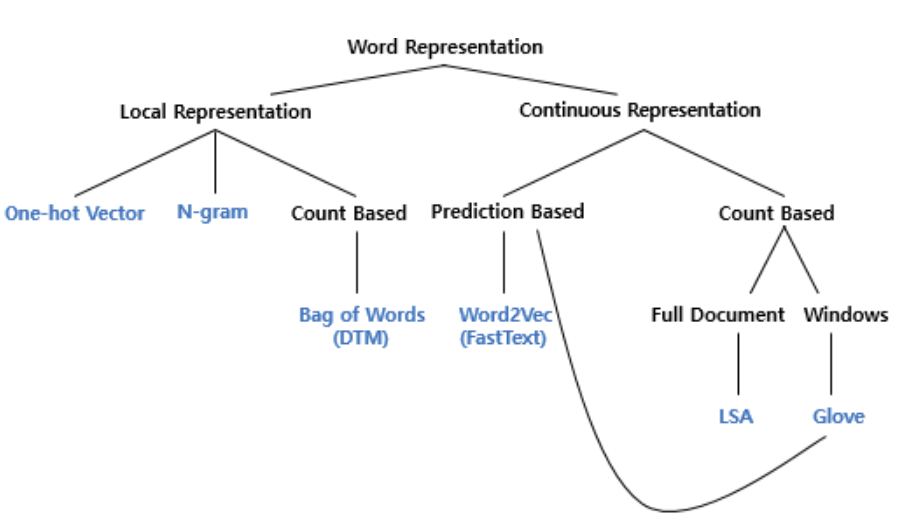

#4-2 Bag of Words(BoW)

##1. Bag of Words란?

간단하게 말해서 그냥 가방이다.  

만드는 과정 :
  1. 각 단어에 고유한 정수 인덱스를 부여함.
  2. 각 인덱스의 위치에 단어토큰의 등장 횟수를 기록한 벡터를 만듦.

코드를 보자

In [2]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 44.4 MB/s eta 0:00:00


In [5]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)
      bow.insert(len(word_to_index) - 1, 1)
    else:
      index = word_to_index.get(word)
      bow[index]=bow[index]+1

  return word_to_index, bow

In [6]:
doc1 = "정부가 발표하는 물가상승룰과 소비자가 느끼는 물가상승룰은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :',vocab)
print('bag of words vector :',bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가': 4, '상승': 5, '룰': 6, '과': 7, '소비자': 8, '느끼는': 9, '은': 10, '다르다': 11}
bag of words vector : [1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1]


##2. Bag of Words의 다른 예제들

In [7]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)


vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


doc1과 doc2를 합쳐서 doc3를 만들 수 있음.

In [9]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)
# 문장을 합쳐서 결과 다시 build하기

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가': 4, '상승': 5, '룰': 6, '과': 7, '소비자': 8, '느끼는': 9, '은': 10, '다르다': 11, '는': 12, '주로': 13, '소비': 14, '상품': 15, '을': 16, '기준': 17, '으로': 18, '물가상승률': 19, '느낀다': 20}
bag of words vector : [1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


##3. CountVectorizer 클래스로 BoW 만들기

사이킷 런에서 BoW를 할 수 있게 `CountVectorizer` 클래스를 지원함.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

print('bag of words vector :', vector.fit_transform(corpus).toarray())

print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


CountVectorizer는 띄어쓰기만을 기준으로 단어를 자름.  
한국어에서는 토큰화가 잘 되지 않음.

##4. 불용어를 제거한 BoW 만들기

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

###1) 사용자가 직접 정의한 불용어 사용

In [14]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)


bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


###2) CountVectorizer에서 제공하는 자체 불용어 사용

In [15]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


###3) NLTK에서 지원하는 불용어 사용

In [19]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)


bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


#4-3 문서 단어 행렬(Document-Term Matrix, DTM)

단어와 문서를 행과 열로 표현하여 count한 개수를 값으로 가지는 행렬

##문서 단어 행렬(Document-Term Matrix)의 한계

###1) 희소 표현(Sparse representation)

빈공간이 많아 공간 복잡도와 계산 복잡도가 높음

###2) 단순 빈도 수 기반 접근

불용어를 제거 안한 BoW일 경우 단순한 단어가 많다는 이유로 비슷하다고 판단할 가능성이 있음

#4-4 TF-IDF(Term Frequency-Inverse Document Frequency)

##1. TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)